Working with the Titanic Data sets off Kaggle
https://www.kaggle.com/c/titanic

Authors: C.W. and Jacob D.
Started: 9/4/2020

In [3]:
# === Initialize the needed modules ===
import sys 
print("Python version: {}". format(sys.version))

# -- for data processing -- 
import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import pandas as pd #collection of functions for data processing and analysis
print("pandas version: {}". format(pd.__version__))

# -- for Data Visualization -- 
import matplotlib.pyplot as plt 
import matplotlib #collection of functions for scientific visualization
print("matplotlib version: {}". format(matplotlib.__version__))

matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

# -- for Mathematics and Machine Learning Algorithms -- 
# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats
import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# PyMC3 for Bayesian Inference
import pymc3 as pm
print("PyMC3 version: {}".format(pm.__version__))

# AutoImpute for missing data analysis
import autoimpute as ipt
print("AutoImpute version: {}".format(ipt.__version__))
from autoimpute.utils import md_pattern, proportions
from autoimpute.visuals import plot_md_locations, plot_md_percent
from autoimpute.visuals import plot_imp_dists, plot_imp_boxplots
from autoimpute.visuals import plot_imp_swarm
from autoimpute.imputations import MultipleImputer

# -- for misc uses -- 
import random
import time

print("=== Loaded Modules ===")

Python version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
NumPy version: 1.19.1
pandas version: 1.1.1
matplotlib version: 3.3.1
SciPy version: 1.5.2
scikit-learn version: 0.23.2
PyMC3 version: 3.9.3
AutoImpute version: 0.12.0
=== Loaded Modules ===


In [4]:
# === Load the Data == 
data_pd_train = pd.read_csv('train.csv')
data_pd_test  = pd.read_csv('test.csv')
print("=== Loaded Data ===")

data_np_train = data_pd_train.to_numpy()
print('Data size is ',data_np_train.shape) 
print("-"*10)
print("=== Data Information ===")
print(data_pd_train.info()) #need data in Panda format
print("-"*10)
print("=== Data Header and a little data ===")
data_pd_train.head()  #need data in Panda format

=== Loaded Data ===
Data size is  (891, 12)
----------
=== Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
----------
=== Data Header and a little data ===


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5, 1.0, 'Distribution of Passenger Cabin Fare')

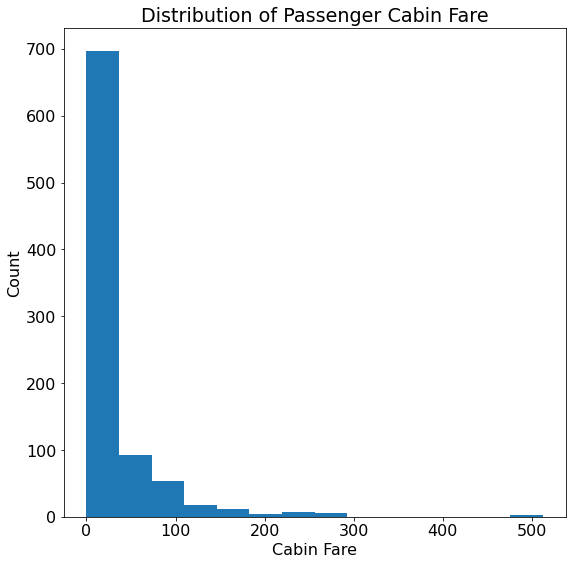

In [5]:
# Histogram of Age <--- Does not work due to missing values
# plt.hist(data_pd_train['Age'], bins = 14)
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.title('Distribution of Passenger Age')


# Histogram of Cabin Fare
plt.hist(data_pd_train['Fare'], bins = 14)
plt.xlabel('Cabin Fare')
plt.ylabel('Count')
plt.title('Distribution of Passenger Cabin Fare')

In [6]:
Indx_Male = (data_pd_train['Sex'] == 'male');
Indx_Female = (data_pd_train['Sex'] == 'female');
data_pd_train_Male = data_pd_train.loc[Indx_Male,:];
data_pd_train_Female = data_pd_train.loc[Indx_Female,:];

print('Male Passengers')
print("-"*10)
print(Indx_Male)
print("="*10)
print('Female Passengers')
print("-"*10)
print(Indx_Female)
print("="*10)


Male Passengers
----------
0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool
Female Passengers
----------
0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: Sex, Length: 891, dtype: bool


Text(0.5, 1.0, 'Density Plot of Cabin Fare by Gender')

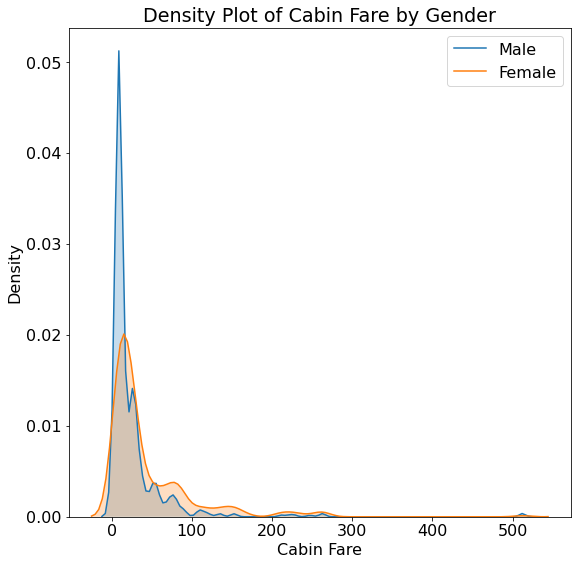

In [7]:
# Make one shaded distribution plot for each sex
sns.kdeplot(data_pd_train_Male['Fare'], label = 'Male', shade = True)
sns.kdeplot(data_pd_train_Female['Fare'],  label = 'Female', shade = True)


# Add labeling
plt.xlabel('Cabin Fare')
plt.ylabel('Density')
plt.title('Density Plot of Cabin Fare by Gender')

Convert non-numeric values that may be of interst to numeric values for data analysis (e.g. Sex, Embarked)  -- use the .astype command

In [8]:
# For Sex - create numerical columns for Categorical variables
# 1 for female, 2 of male so we have non-zero integers
data_pd_train_SexInt = Indx_Male.astype(int) + 1 
data_pd_train_mod = data_pd_train
data_pd_train_mod['Sex'] = data_pd_train_SexInt;

data_pd_train_mod.head()  #need data in Panda format

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Find correlations of the variables that coorleate with the survivors and sort
data_pd_train_mod.corr()['Survived'].sort_values()

Sex           -0.543351
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

Here we see that the Survivors have strong correlations with "Sex", "PClass" and "Fare". "Fare" and "PClass" are probably highly related. Other varibles that are loosly  correlated (next two highest) are "Parch" and "Age". 

Text(0.5, 1.0, 'Distribution of Passenger Class')

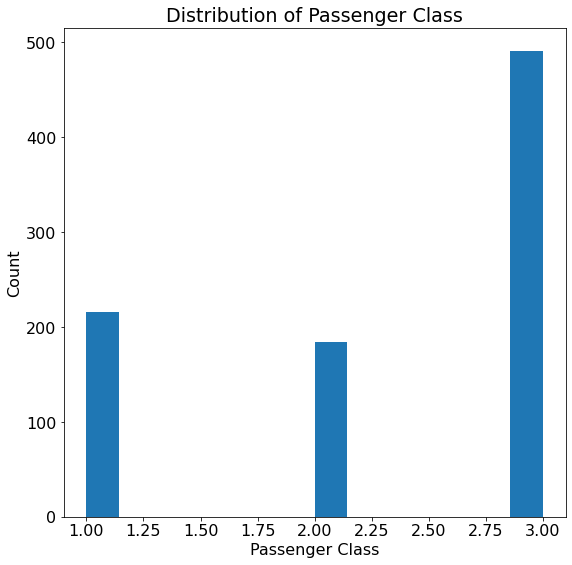

In [10]:
# Histogram of Cabin Fare
plt.hist(data_pd_train['Pclass'], bins = 14)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Distribution of Passenger Class')

Text(0.5, 1.0, 'Density Plot of Passenger Class by Gender')

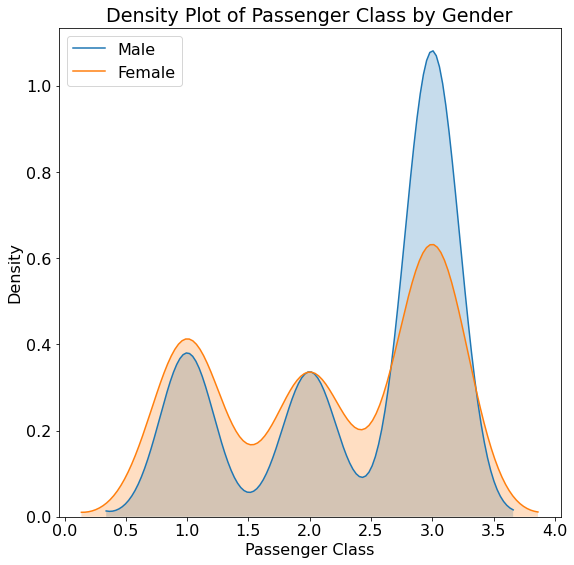

In [11]:
# Make one shaded distribution plot for each sex
sns.kdeplot(data_pd_train_Male['Pclass'], label = 'Male', shade = True)
sns.kdeplot(data_pd_train_Female['Pclass'],  label = 'Female', shade = True)

# Add labeling
plt.xlabel('Passenger Class')
plt.ylabel('Density')
plt.title('Density Plot of Passenger Class by Gender')


Now let us identify where the missing values are in the dataset

In [12]:
# === Identify Missing Data === 
print('Train columns with null values:\n', data_pd_train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_pd_test.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


== For now ==, (we will revisit this later) let us eliminate the variables with missing data "Age" and "Cabin"

We are going to format the data with Train data and Validation Data (both generated from the 'train.csv' data set) for the algorithms we will try - For this time, we are going to drop a few things from the dataset - Age, Cabin, Ticket, Name, and SibSp

In [13]:
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets
def format_data(df):
    # Targets are if the passenger Survived or not
    labels = df['Survived']
    
    # Drop the selected varibles
    df = df.drop(columns=['SibSp','Name','Ticket','Age','Cabin','PassengerId'])
    
    # One-Hot Encoding of Categorical Variables (for "Embarked")
    df = pd.get_dummies(df)
       
    # Split into training/testing sets with 20% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.20,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = format_data(data_pd_train_mod)
X_train.head()

,Survived,Pclass,Sex,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
331,0,1,2,0,28.5000,0,0,1
733,0,2,2,0,13.0000,0,0,1
382,0,3,2,0,7.9250,0,0,1
704,0,3,2,0,7.8542,0,0,1
813,0,3,1,2,31.2750,0,0,1


Look at the size of the datasets

In [15]:
print(X_train.shape)
print(X_test.shape)

(712, 8)
(179, 8)


Now we are going to look at at the variables against each other using Seaborn's PairGrid

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_leve

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


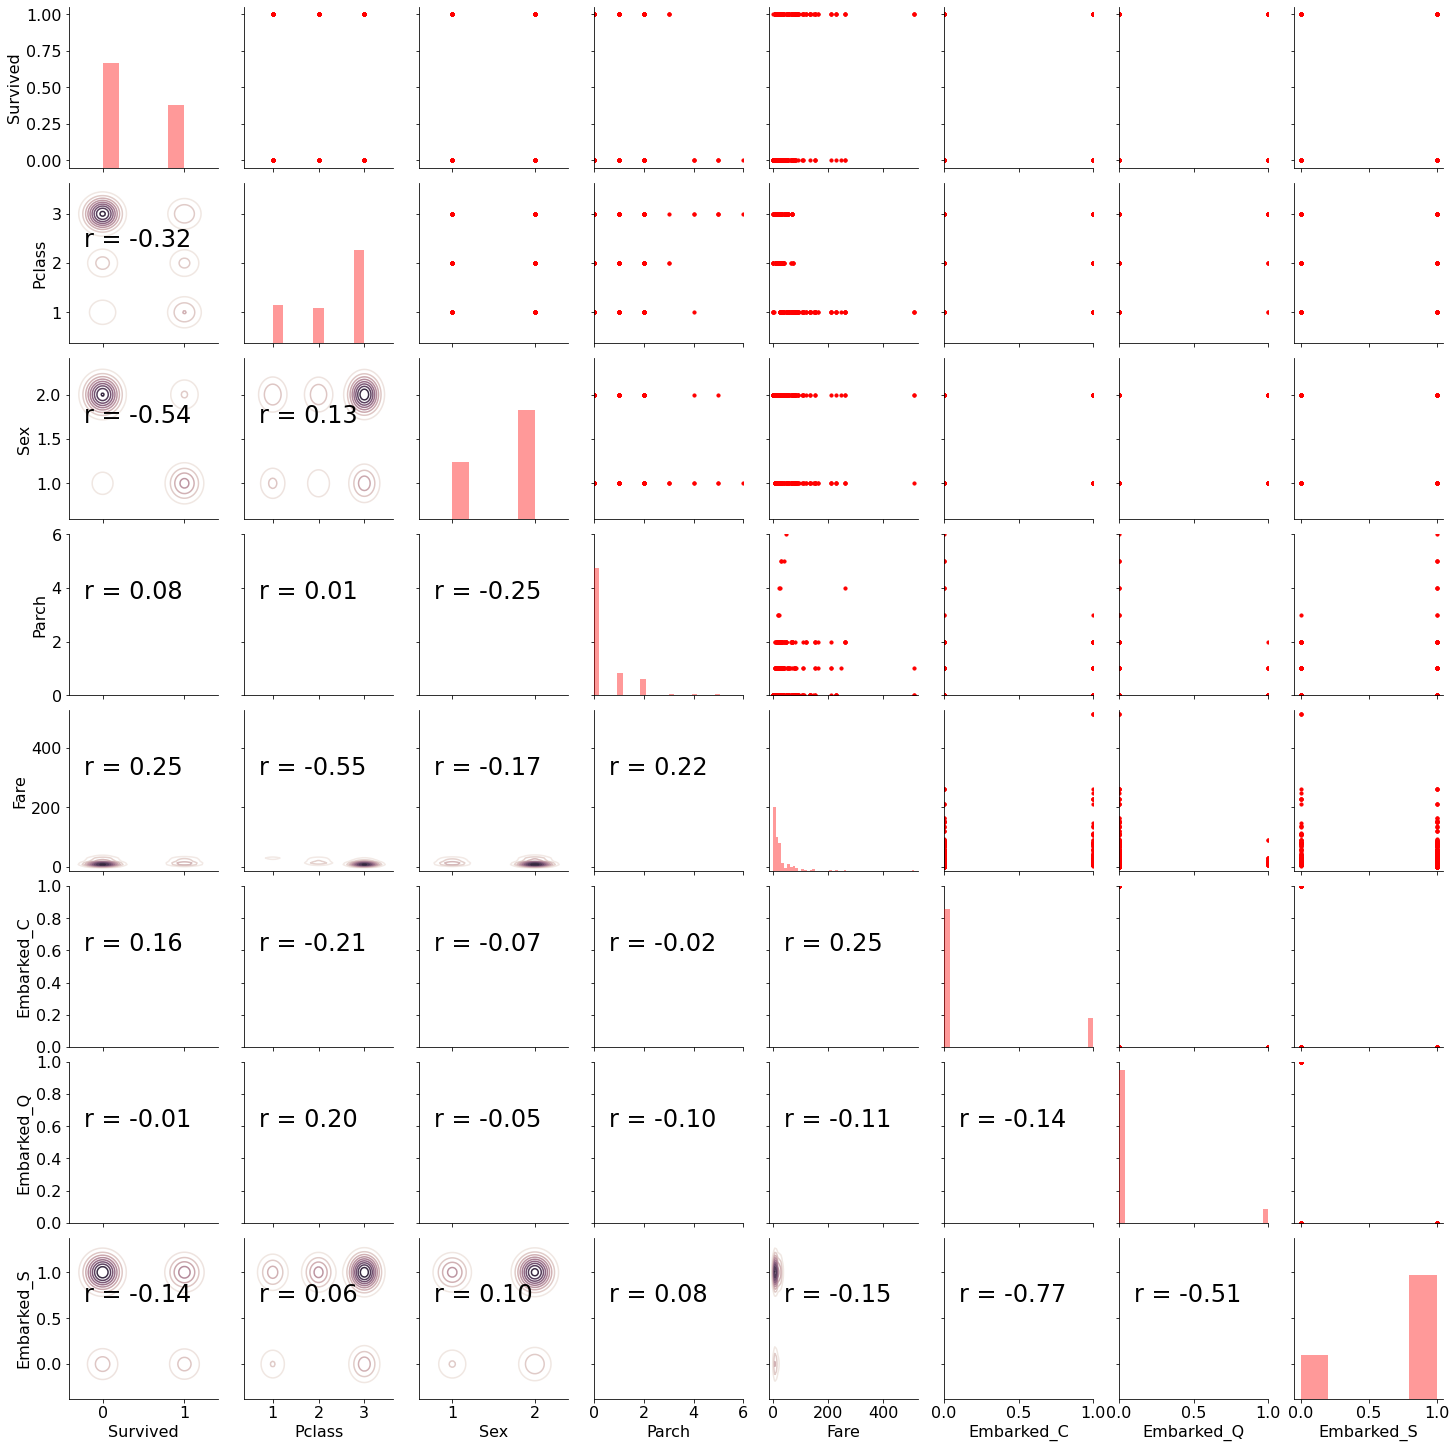

In [16]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

This is visualization that illustrates our correlation observations earlier, Dominant variables are "Fare","Sex", and "Pclass". Additionally "Fare" and "Class" have a correlation of 0.55 (relativly highly correlated). Additionally we se that we have a lot of discrete variables, and on only one ("Fare") value that is more continious

----------------------------------------------

Metrics

For this regression task, we will use two standard metrics:

Mean Absolute Error (MAE): Average of the absolute value of the difference between predictions and the true values

Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predictions and the true values.

In [17]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

Naive Baseline

For a regression task, a simple naive baseline is to guess the median value on the training set for all testing cases. If our machine learning model cannot better this simple baseline, then is it no good for prediction...

In [18]:
# Naive baseline is the median
median_pred = X_train['Survived'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['Survived']

In [19]:
# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

Median Baseline  MAE: 0.4134
Median Baseline RMSE: 0.6430


In [19]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='Survived')
    X_test = X_test.drop(columns='Survived')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [20]:
results = evaluate(X_train, X_test, y_train, y_test)

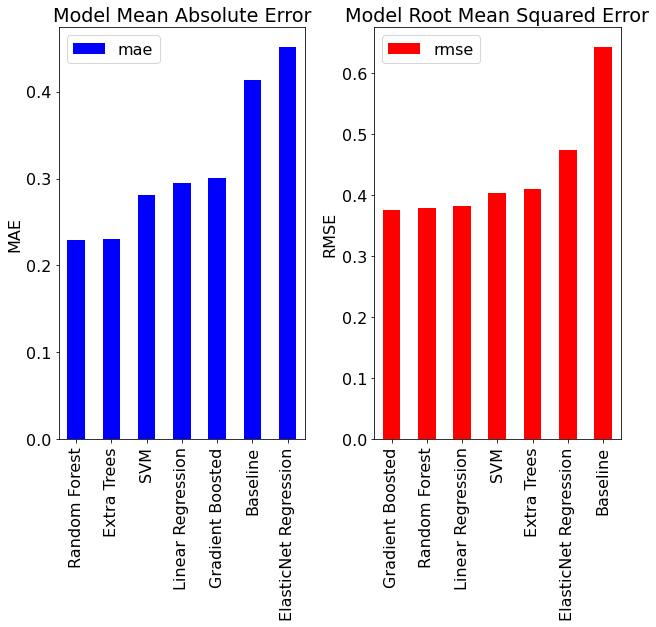

In [22]:

matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [23]:
results

,mae,rmse
Linear Regression,0.294394,0.381903
ElasticNet Regression,0.451216,0.473736
Random Forest,0.229011,0.379433
Extra Trees,0.230435,0.411025
SVM,0.281478,0.403788
Gradient Boosted,0.300604,0.375764
Baseline,0.413408,0.642968


In [24]:

print('The Gradient Boosted regressor is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['Gradient Boosted', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The Gradient Boosted regressor is 27.29% better than the baseline.


Formula from Ordinary Least Squares Linear Regression

In [26]:
lr = LinearRegression()
lr.fit(X_train.drop(columns='Survived'), y_train)

ols_formula = 'Survived = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])

'Survived = 1.64 + -0.13 * Pclass + -0.52 * Sex + -0.03 * Parch + 0.00 * Fare + -0.01 * Embarked_C + -0.05 * Embarked_Q + -0.10 * Embarked_S'

Implementing Bayesian Linear Regression

In [28]:
# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'Survived ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]]) 
# ++ In the future want to add combination of varibles, **remember F= m*a not F = m+a **
formula

'Survived ~ Pclass + Sex + Parch + Fare + Embarked_C + Embarked_Q + Embarked_S'

#Create Model in PyMC3 and Sample from Posterior

We now build the model using the formula defined above and a normal distribution for the data likelihood. Then, we let a Markov Chain Monte Carlo algorithm draw samples from the posterior to approximate the posterior for each of the model parameters.

== below we use normal distritions for the variables, we will change to more appropriate distributions once we get the code working === 

In [ ]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=200, chains = 2, tune = 500)

We are going to use the impute tools to replace null values with actual values
(https://pypi.org/project/autoimpute/)
This will allow us to generate a more rich data set using all Age Data --> this is key as Age may be highly correlated to Survival as per the adage "Save the Women and Children" 